# Training the electric network

Write a two-layer neural network to train image in raw format. The network is trained to predict the electric network from the image. The network is trained on the training set and evaluated on the test set. The network is trained using stochastic gradient descent with a fixed learning rate and no regularization.

The input tensor is a 32 * 32 raw image and flatten to 1 * 1024.

The weight value in the 1st layer should be binary (+1 or -1), the dimension of the weight matrix is 1024*32. The activation function is relu function.

The weight value in the 2nd layer signed 16 bit, the dimension of the weight matrix is 32 *3. The output is 1 *3 matrix. The activation function is softmax function.

In [3]:
# import the necessary packages
import torch as torch
import torch.nn as nn

# import raw image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


## 1. Load data

[[ 4807  4278  3877 ...  6170  5251  3394]
 [ 8557  7995  7807 ... 10571  8467  3529]
 [ 9520  7299  8458 ...  9944  7213  3573]
 ...
 [ 5600  7281  7108 ...  5810  3004  2989]
 [ 7732  8519  8391 ...  5457  3071  3112]
 [ 7827  7680  6760 ...  5701  3136  3038]]


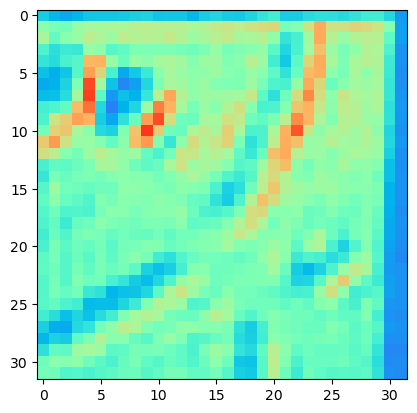

In [5]:
# open the raw image file
with open('红外光测试/img32x32_20231023_113512/pic_20231023_1136 0_163.raw', 'rb') as f:
    # read the raw image data
    raw_data = f.read()

# create a PIL image from the raw data
width, height = 32, 32
img = Image.frombytes('I;16', (width, height), raw_data, decoder_name='raw')

# convert the PIL image to a numpy array
image = np.array(img)
print(image)

# display the image
plt.imshow(image, cmap='rainbow', vmin=0, vmax=2**14-1)
plt.show()

## 2. make a dataset
3 kinds of objects in 3 folders, 250 raw images in each folder, labeled as 0, 1, 2.

In [1]:
# define a data set 

import torchvision.transforms as transforms
import torchvision.datasets as datasets

# define the path to the root folder of the dataset
root = 'path/to/dataset'

# define the transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# create the ImageFolder dataset
dataset = datasets.ImageFolder(root=root, transform=transform)

# print the number of images in the dataset
print(len(dataset))

# print the class labels
print(dataset.classes)

# print the number of images per class
print(dataset.class_counts)

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/dataset'